In [144]:
import sys
import pandas as pd
import numpy as np
import sklearn
import random
import time

In [146]:
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [148]:
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [150]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
mpl.style.use('ggplot')

In [154]:
#加载数据集
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')

In [156]:
#显示部分数据
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [160]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [162]:
#列转换成小写
data_raw.columns = data_raw.columns.str.lower()
data_val.columns = data_val.columns.str.lower()

In [164]:
data_raw.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


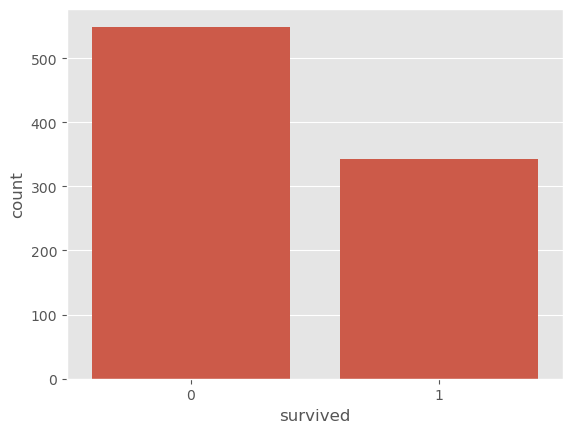

In [166]:
sns.countplot(data=data_raw, x='survived')#现在要求要指定data和x参数
plt.show()

In [168]:
# 查看每列缺失值数量和比例
missing_data = data_raw.isnull().sum()#所有缺失值相加
missing_percent = (data_raw.isnull().sum() / len(data_raw)) * 100#百分比
missing_info = pd.concat([missing_data, missing_percent], axis=1, keys=['缺失数量', '缺失比例'])#纵轴是两个
print(missing_info)

             缺失数量       缺失比例
passengerid     0   0.000000
survived        0   0.000000
pclass          0   0.000000
name            0   0.000000
sex             0   0.000000
age           177  19.865320
sibsp           0   0.000000
parch           0   0.000000
ticket          0   0.000000
fare            0   0.000000
cabin         687  77.104377
embarked        2   0.224467


In [170]:
data_val.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [172]:
#对训练集进行描述
data_raw.describe(include = 'all')

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [174]:
# 正确用法：keys的数量等于待合并DataFrame的数量
data_all = pd.concat([data_raw, data_val], 
                    keys=['train', 'test'],  # 标记来源
                    copy=False) .             # 避免内存复制
#定义填充值
median_age = data_raw['age'].median()
median_fare = data_raw['fare'].median()
embarked_mode = data_raw['embarked'].mode()[0]

#  一次性填充所有列
data_all = data_all.fillna({
    'age': median_age,
    'fare': median_fare,
    'embarked': embarked_mode})

#  验证结果
print(data_all[['age', 'fare','embarked']].isnull().sum())

age         0
fare        0
embarked    0
dtype: int64


In [176]:
#删除一些字段
drop_columns = ['cabin', 'passengerid','ticket']
data_all = data_all.drop(drop_columns, axis=1)

In [178]:
#验证是否删掉列
data_raw = data_all.xs('train')
data_val = data_all.xs('test')
print("data_raw列名:", data_raw.columns.tolist())
print("data_val列名:", data_val.columns.tolist())

data_raw列名: ['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
data_val列名: ['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']


In [180]:
# 1. 创建家庭规模列
data_all['family_size'] = data_all['sibsp'] + data_all['parch'] + 1

# 2. 创建单身状态列
data_all['single'] = 0  # 默认值设为0（不单身）
data_all.loc[data_all['family_size'] == 1, 'single'] = 1  # 单身的设为1

# 3. 从姓名提取称呼（更稳健的写法）
data_all['title'] = (
    data_all['name']
    .str.split(', ', expand=True)[1]
    .str.split('.', expand=True)[0]
    .str.strip()
)
# 4 票价 fare_bin
data_all['fare_bin'] = pd.qcut(data_all['fare'], 4)#根据票价分为4组 每组人数一致
#5 年龄进行分组 age_bin
data_all['age_bin'] = pd.cut(data_all['age'].astype(int), 5)#根据年龄分为5组人数不一致

In [182]:
data_all.head()

survived  pclass                                               name  \
train 0       0.0       3                            Braund, Mr. Owen Harris   
      1       1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
      2       1.0       3                             Heikkinen, Miss. Laina   
      3       1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
      4       0.0       3                           Allen, Mr. William Henry   

            sex   age  sibsp  parch     fare embarked  family_size  single  \
train 0    male  22.0      1      0   7.2500        S            2       0   
      1  female  38.0      1      0  71.2833        C            2       0   
      2  female  26.0      0      0   7.9250        S            1       1   
      3  female  35.0      1      0  53.1000        S            2       0   
      4    male  35.0      0      0   8.0500        S            1       1   

        title           fare_bin       age_bin  
train 0    Mr    (-0.001, 7.896]  (16.0, 32.0]  
      1   Mrs  (31.275, 512.329]  (32.0, 48.0]  
      2  Miss    (7.896, 14.454]  (16.0, 32.0]  
      3   Mrs  (31.275, 512.329]  (32.0, 48.0]  
      4    Mr    (7.896, 14.454]  (32.0, 48.0]

In [184]:
#根据title统计人数
# 按标记拆分
data_raw = data_all.xs('train')
data_val = data_all.xs('test')
data_raw['title'].value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [186]:
# 步骤1：基于训练集统计确定rare titles
title_counts = data_raw['title'].value_counts()
rare_titles = title_counts[title_counts < 10].index

# 步骤2：替换训练集和测试集
data_raw.loc[:, 'title'] = data_raw['title'].replace(rare_titles, 'Others')
data_val.loc[:, 'title'] = data_val['title'].replace(rare_titles, 'Others')

In [188]:
data_raw['title'].value_counts()

title
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: count, dtype: int64

In [190]:
data_raw['survived'].groupby(data_raw['title']).mean()

title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
Others    0.444444
Name: survived, dtype: float64

In [192]:
#构建新的字段 基于sklearn中的LabelEncoder 转换为数字
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.896]","(16.0, 32.0]"
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.275, 512.329]","(32.0, 48.0]"
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.896, 14.454]","(16.0, 32.0]"
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.275, 512.329]","(32.0, 48.0]"
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.896, 14.454]","(32.0, 48.0]"


In [194]:
lable = LabelEncoder()

In [196]:
#再把分好段的转换成编码的模式 
#新字段 'sex_code'
data_all['sex_code'] = lable.fit_transform(data_all['sex'])
#新字段 'embarked_code'
data_all['embarked_code'] = lable.fit_transform(data_all['embarked'])
#新字段 'title_code'
data_all['title_code'] = lable.fit_transform(data_all['title'])
#新字段 'age_bin_code'
data_all['age_bin_code'] = lable.fit_transform(data_all['age_bin'])
#新字段 'fare_bin_code'
data_all['fare_bin_code'] = lable.fit_transform(data_all['fare_bin'])
data_raw = data_all.xs('train')
data_val = data_all.xs('test')
data_raw.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin,sex_code,embarked_code,title_code,age_bin_code,fare_bin_code
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.896]","(16.0, 32.0]",1,2,3,1,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.275, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.896, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.275, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.896, 14.454]","(32.0, 48.0]",1,2,3,2,1


In [198]:
#列的名称
data_raw.columns.tolist()

['survived',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'family_size',
 'single',
 'title',
 'fare_bin',
 'age_bin',
 'sex_code',
 'embarked_code',
 'title_code',
 'age_bin_code',
 'fare_bin_code']

In [200]:
#方式一 特征选择
Target = ['survived']#标签
data_colunms_one = ['sex', 'pclass', 'embarked', 'title', 'sibsp', 'parch', 'age', 'fare', 'family_size', 'single', ]
colunms_one = Target + data_colunms_one

In [202]:
#方式二 特征选择
data_colunms_two = ['sex_code', 'pclass', 'embarked_code', 'title_code', 'sibsp', 'parch', 'age', 'fare']
colunms_two = Target + data_colunms_two

In [204]:
#方式三 特征选择
data_colunms_three = ['sex_code', 'pclass', 'embarked_code', 'title_code', 'family_size', 'age_bin_code', 'fare_bin_code']
colunms_three = Target + data_colunms_three

In [206]:
#公告pandas中的get_dummies()进行编码
data_one_dummy = pd.get_dummies(data_raw[data_colunms_one])
data_one_dummy_list = data_one_dummy.columns.tolist()
data_one_dummy_list

['pclass',
 'sibsp',
 'parch',
 'age',
 'fare',
 'family_size',
 'single',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_Others']

In [208]:
#构建 获取训练集和测试集

In [210]:
#方式一
#数据进行分割
x_train_one, x_test_one, y_train_one, y_test_one = model_selection.train_test_split(data_one_dummy[data_one_dummy_list],
                                                                   data_raw[Target],
                                                                   random_state = 0)
x_train_one.shape

(668, 17)

In [212]:
x_test_one.shape

(223, 17)

In [214]:
#方式二
x_train_two, x_test_two, y_train_two, y_test_two = model_selection.train_test_split(data_raw[data_colunms_two],
                                                                   data_raw[Target],
                                                                   random_state = 0)
x_train_two.shape

(668, 8)

In [216]:
#方式三
x_train_three, x_test_three, y_train_three, y_test_three = model_selection.train_test_split(data_raw[data_colunms_three],
                                                                   data_raw[Target],
                                                                   random_state = 0)
x_train_three.shape

(668, 7)

In [218]:
#随机森林算法实现 分类回归很好
from sklearn.model_selection import GridSearchCV
#集成学习
from sklearn.ensemble import RandomForestClassifier

In [242]:
#生成随机种子
rf = RandomForestClassifier(max_features='sqrt',
                            random_state=1,
                            n_jobs=-1)#多线程训练

In [244]:
#随机网格算法生成 
param_grid = {
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' : [1, 5, 10],#叶子节点选择
    'min_samples_split' : [2, 4, 10, 12, 16],#最少的分割
    'n_estimators' : [50, 100, 400, 700, 1000]#决策树数量
}

In [246]:
#网格搜索
gs = GridSearchCV(estimator=rf,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv = 3,#交叉验证
                 n_jobs=-1)

In [248]:
#对特征一进行验证
gs = gs.fit(x_train_one,y_train_one)

D:\anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
D:\anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [250]:
print(gs.best_score_)

0.8323839534601868


In [252]:
print(gs.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 50}


In [254]:
#创建一个对象
rf2 = RandomForestClassifier(criterion='entropy',
                            min_samples_leaf=5,
                            min_samples_split=12,
                            n_estimators=50,
                            n_jobs=-1,
                            random_state=1)

In [288]:
rf2.fit(x_train_one,y_train_one)

D:\anaconda\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=12, n_estimators=50, n_jobs=-1,
                       random_state=1)

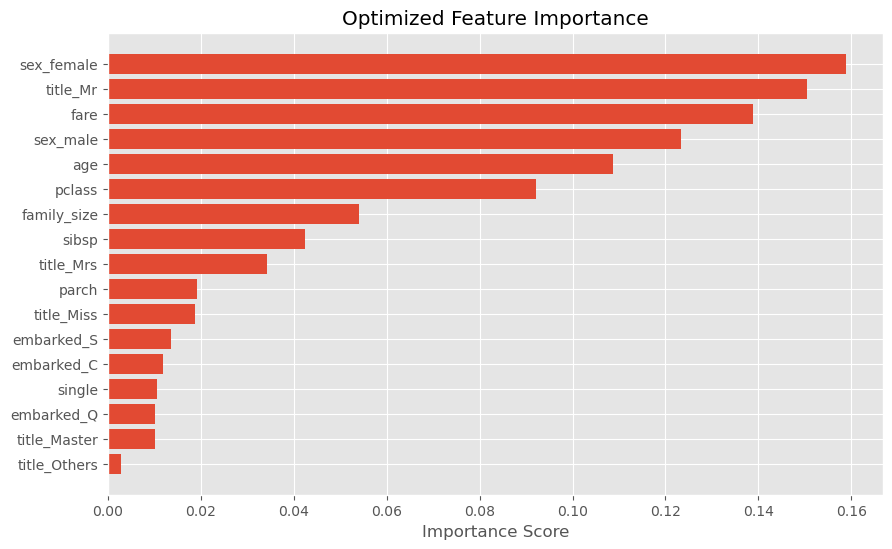

In [290]:
importance = pd.DataFrame({
    'Feature': x_test_one.columns,
    'Importance': rf2.feature_importances_
}).sort_values('Importance', ascending=False)
# 可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel('Importance Score')
plt.title('Optimized Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [292]:
pred = rf2.predict(x_test_one)

In [294]:
pred_df = pd.DataFrame(pred, columns= ['survived'])
pred_df.head()

,survived
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
